Isuru Sanjeewa - Octave JKH - Answers

# Q 1) Case Study: Apartment Rental Market in Colombo

In [9]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Octave - John Keells Codes/Q1 Apartment Rentals Dataset.xlsx')

In [10]:
df.head(2)

,Apartment_ID,Rental_Price_USD,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center_KM,Neighborhood,Furnished,Building_Type
0,1,2248,748,2,1,2.07,Uptown,Yes,Apartment
1,5,1883,696,1,1,7.41,Uptown,No,Apartment


##(1) Descriptive Statistics:

### a. Generate summary statistics tables which consist of extreme values (min & max), standard deviation, median and quartile elements for all the numerical features in the dataset.  

In [11]:
df.describe()

,Apartment_ID,Rental_Price_USD,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center_KM
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,121.523810,2039.690476,976.702381,1.821429,1.571429,6.044405
std,72.802005,464.611769,188.574601,0.823754,0.497844,3.623142
min,1.000000,987.000000,540.000000,1.000000,1.000000,0.570000
25%,57.000000,1739.500000,845.000000,1.000000,1.000000,2.887500
50%,126.500000,2052.000000,994.500000,2.000000,2.000000,6.265000
75%,179.750000,2273.250000,1104.500000,3.000000,2.000000,9.322500
max,249.000000,3926.000000,1431.000000,3.000000,2.000000,11.860000


###b) Generate summary statistics tables for all the categorical features in the dataset.

In [12]:
import pandas as pd

categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
  print(f"Summary statistics for '{col}'")
  print(df[col].value_counts(normalize=True) * 100)
  print("-" * 30)


Summary statistics for 'Neighborhood'
Neighborhood
Uptown      35.714286
Suburbs     22.619048
Downtown    22.619048
Midtown     19.047619
Name: proportion, dtype: float64
------------------------------
Summary statistics for 'Furnished'
Furnished
Yes    51.190476
No     48.809524
Name: proportion, dtype: float64
------------------------------
Summary statistics for 'Building_Type'
Building_Type
Apartment    100.0
Name: proportion, dtype: float64
------------------------------


###c) Calculate the probability of finding any apartment in Downtown with a rental price below Rs 500,000/= using the normal distribution assumption. Provide all the calculations and the visual diagram. Assume 1 USD = Rs 304.00

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

df['Rental Price (Rs)'] = df['Rental_Price_USD'] * 304.00

mean_price = df['Rental Price (Rs)'].mean()
std_dev_price = df['Rental Price (Rs)'].std()

price_threshold_usd = 500000
probability = norm.cdf(price_threshold_usd, loc=mean_price, scale=std_dev_price)

print(f"Mean rental price (Rs): {mean_price}")
print(f"Standard deviation of rental price (Rs): {std_dev_price}")
print(f"Probability of finding an apartment below Rs 500,000): {probability}")

Mean rental price (Rs): 620065.9047619047
Standard deviation of rental price (Rs): 141241.97774933995
Probability of finding an apartment below Rs 500,000): 0.19764242205290977


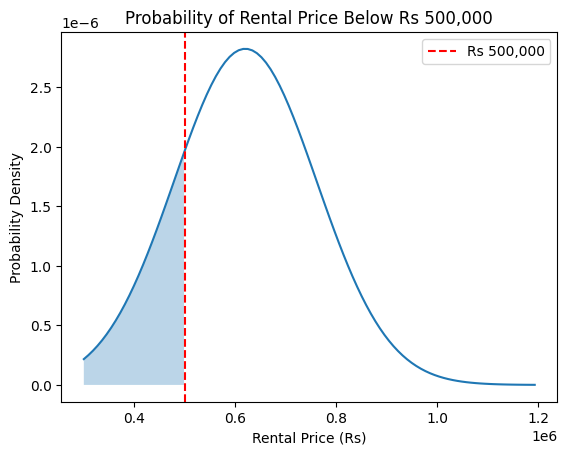

In [15]:
x_axis = np.linspace(df['Rental Price (Rs)'].min(), df['Rental Price (Rs)'].max(), 100)
plt.plot(x_axis, norm.pdf(x_axis, loc=mean_price, scale=std_dev_price))

plt.fill_between(x_axis, norm.pdf(x_axis, loc=mean_price, scale=std_dev_price),
                 where=(x_axis < price_threshold_usd), alpha=0.3)
plt.axvline(x=price_threshold_usd, color='red', linestyle='--', label=f'Rs 500,000')
plt.xlabel("Rental Price (Rs)")
plt.ylabel("Probability Density")
plt.title("Probability of Rental Price Below Rs 500,000")
plt.legend()
plt.show()

 ## 2)Data Visualization

### a) Create a visual representation displaying the average rental price for each neighbourhood, categorized by building type.

<ipython-input-43-3d63541bf131>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Neighborhood', y='Rental_Price_USD', hue='Building_Type', data=df, ci=None)


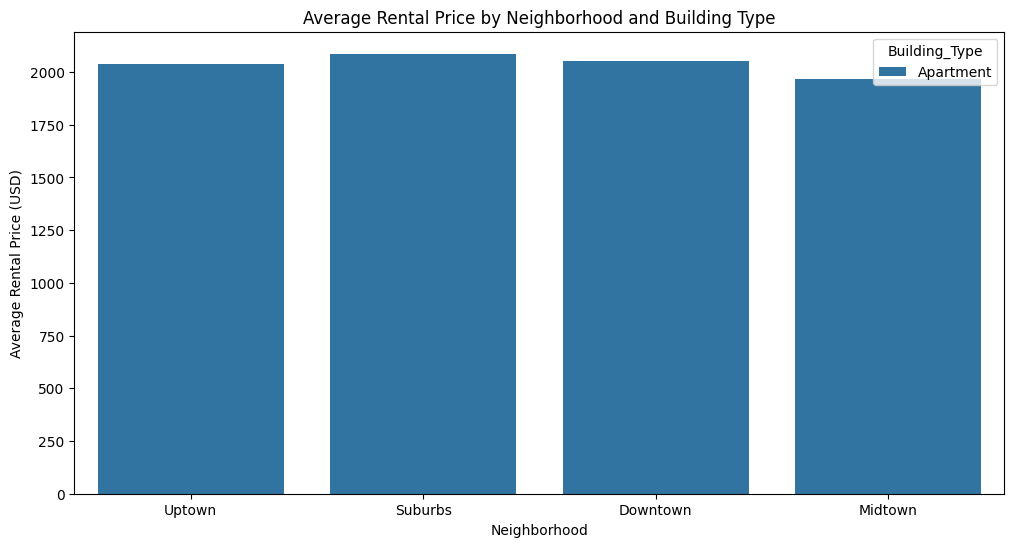

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Neighborhood', y='Rental_Price_USD', hue='Building_Type', data=df, ci=None)
plt.xlabel('Neighborhood')
plt.ylabel('Average Rental Price (USD)')
plt.title('Average Rental Price by Neighborhood and Building Type')
plt.show()

### b)  Create a histogram of the Rental_Price to show the distribution of prices.

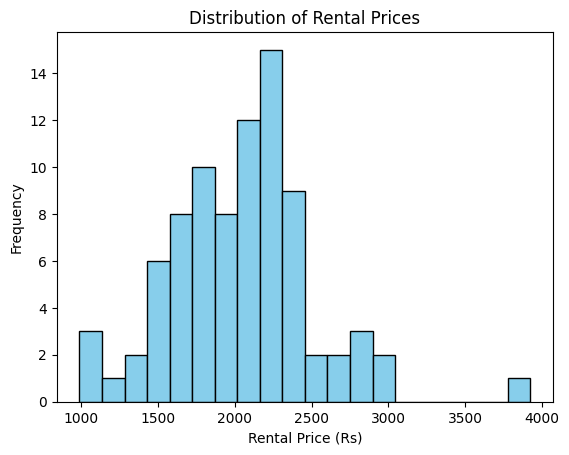

In [24]:
plt.hist(df['Rental_Price_USD'], bins=20, color='skyblue', edgecolor='black') #Added a colour and edge colour to identify bars clearly
plt.xlabel('Rental Price (Rs)')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Prices')
plt.show()

### c) Create a boxplot to compare the distribution of Rental_Price for furnished vs. unfurnished apartments.

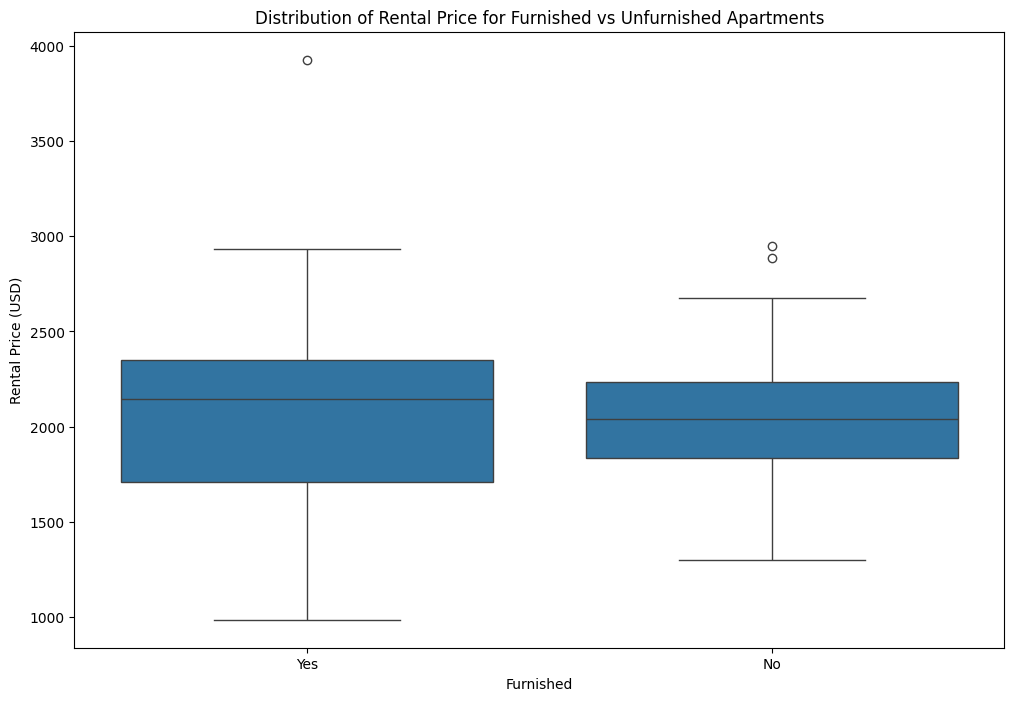

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Furnished', y='Rental_Price_USD', data=df)
plt.xlabel('Furnished')
plt.ylabel('Rental Price (USD)')
plt.title('Distribution of Rental Price for Furnished vs Unfurnished Apartments')
plt.show()

### d) Create a heatmap to visualize the correlation between numerical features.

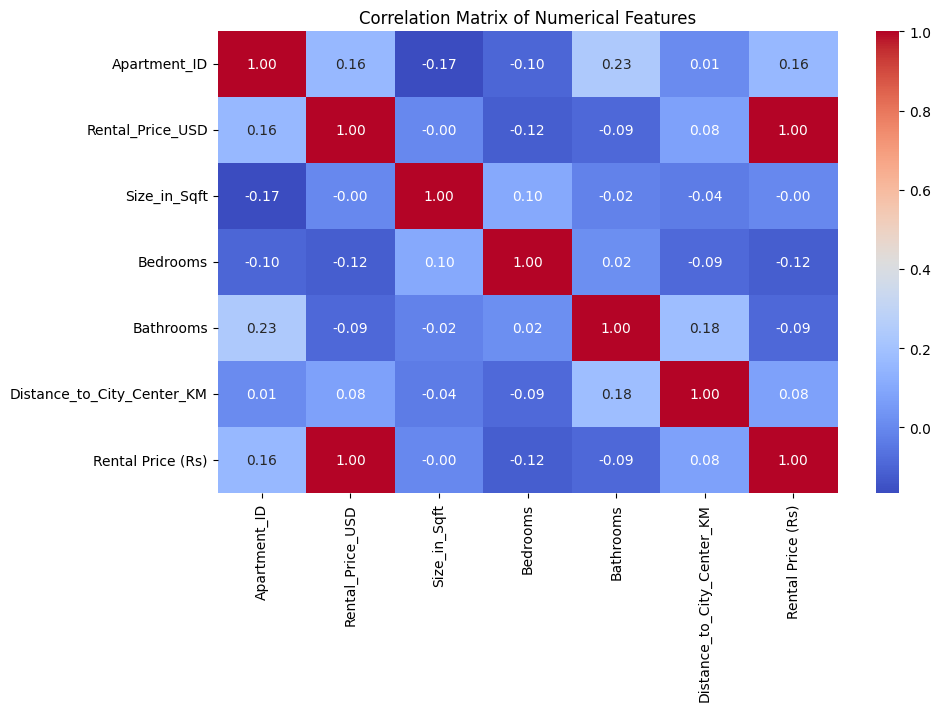

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting numeric features from the DataFrame
numerical_features = df.select_dtypes(include=np.number)

# Creating a correlation matrix for numeric features
correlation_matrix = numerical_features.corr()

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 3) Explorative Data Analysis

### a) What is the average rental price in each neighbourhood, and how does it compare across different areas of the city?

In [34]:
# Calculating and printing the average rental price for each neighborhood
average_rental_prices = df.groupby('Neighborhood')['Rental_Price_USD'].mean()
print(average_rental_prices)

Neighborhood
Downtown    2051.736842
Midtown     1968.312500
Suburbs     2086.842105
Uptown      2040.266667
Name: Rental_Price_USD, dtype: float64


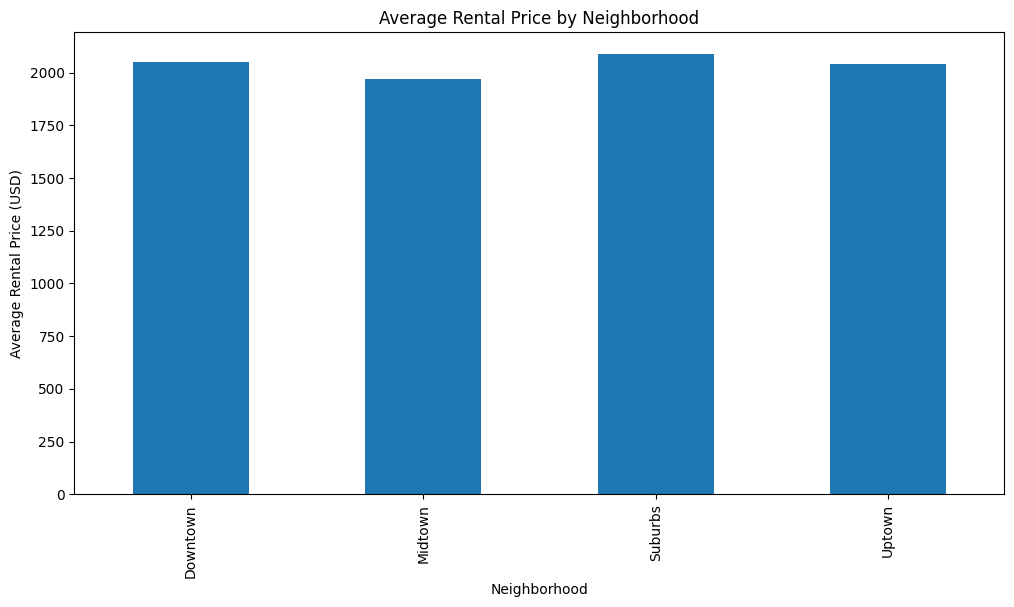

In [36]:
plt.figure(figsize=(12, 6))
average_rental_prices.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Average Rental Price (USD)')
plt.title('Average Rental Price by Neighborhood')
plt.show()

### b) Is there a relationship between the size of the apartment (Size_in_Sqft) and its rental price (Rental_Price)? If so, what is the strength and direction of this relationship?

In [37]:
# Calculating the correlation coefficient
correlation = df['Size_in_Sqft'].corr(df['Rental_Price_USD'])

print(f"The correlation between apartment size and rental price is: {correlation}")

The correlation between apartment size and rental price is: -0.0012622096057841221


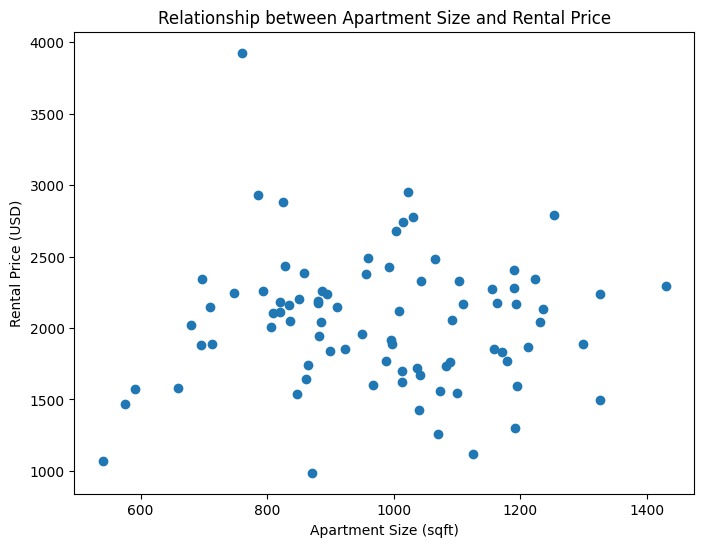

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Size_in_Sqft'], df['Rental_Price_USD'])
plt.xlabel('Apartment Size (sqft)')
plt.ylabel('Rental Price (USD)')
plt.title('Relationship between Apartment Size and Rental Price')
plt.show()

From the calculated correlation value (-0.0012622096057841221), we can conclude that the strength of the correlation between Apartment Size and Rental Price is **Weak**.

Also, when looking at the distribution of data, we cannot identify any direction of correlation. (Zero correlation)

### c) How do furnished and unfurnished apartments differ in terms of rental price? Is there a significant price difference between them?


In [39]:
furnished_prices = df.groupby('Furnished')['Rental_Price_USD'].mean()
print(furnished_prices)

Furnished
No     2025.048780
Yes    2053.651163
Name: Rental_Price_USD, dtype: float64


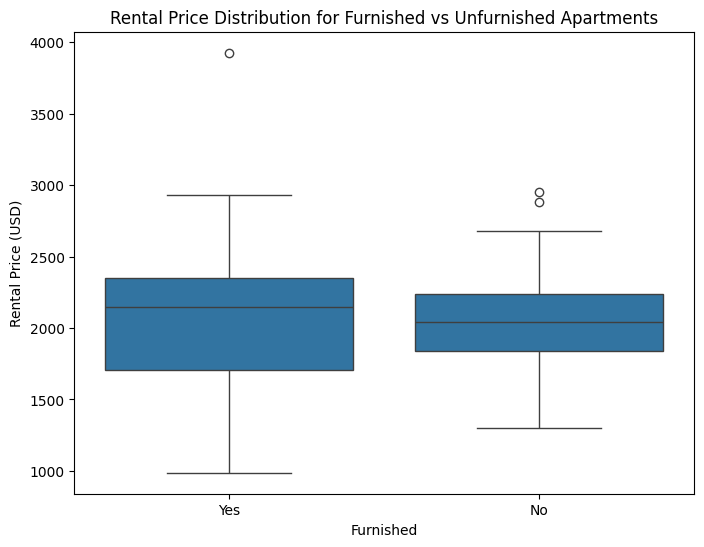

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Furnished', y='Rental_Price_USD', data=df)
plt.xlabel('Furnished')
plt.ylabel('Rental Price (USD)')
plt.title('Rental Price Distribution for Furnished vs Unfurnished Apartments')
plt.show()

From the above boxplot, we can clearly see that there's no any significant difference between Furnished and Unfurnished apartment prices.

### d) List down additional two key insights or interesting observations you discovered from the visual charts and the data analysis you've conducted

1. From the boxplot to visualize Rental Price Distribution for Furnished vs Unfurnished Apartments, outliers are identified which need to be removed when training models.

## 4) Data Modelling

### a) Using all the features write a Python function to build a linear regression model to predict Rental_Price. You can use all the data to build the model. Describe the steps as well

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def build_linear_regression_model(df):
  X = df.drop('Rental_Price_USD', axis=1)  # Defining Features
  y = df['Rental_Price_USD']  # Defining Target variable

  # Identifying numeric and categorical columns
  numerical_cols = X.select_dtypes(include=['number']).columns
  categorical_cols = X.select_dtypes(include=['object']).columns

  # Creating transformers for numerical and categorical features
  numerical_transformer = Pipeline(steps=[
      ('scaler', StandardScaler())
  ])
  categorical_transformer = Pipeline(steps=[
      ('onehot', OneHotEncoder(handle_unknown='ignore'))
      ])

  # Combining transformers using ColumnTransformer
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numerical_transformer, numerical_cols),
          ('cat', categorical_transformer, categorical_cols)
      ])

  # Defining and traning the model
  model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('regressor', LinearRegression())
  ])

  model.fit(X, y)

  return model

linear_regression_model = build_linear_regression_model(df)
linear_regression_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Apartment_ID', 'Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center_KM', 'Rental Price (Rs)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Neighborhood', 'Furnished', 'Building_Type'], dtype='object'))])),
                ('regressor', LinearRegression())])

### b. Write down the mathematical formula to predict the rental priceusing the above features and interpret your model


Mathematical Formula:

Rental_Price_USD = β0 + β1 * Feature1 + β2 * Feature2 + ... + βn * FeatureN

where:

* Rental_Price_USD is the predicted rental price in USD.
* β0 is the intercept (the predicted rental price when all features are zero).
* β1, β2, ..., βn are the coefficients for each feature (representing the change in rental price for a one-unit increase in the corresponding feature, holding all other features constant).
* Feature1, Feature2, ..., FeatureN are the values of the input features (Eg: size, neighborhood, building type, furnished status).


Interpretation of the model:

The coefficients in the linear regression model provide insights into the relationship between each feature and the rental price.  A positive coefficient for a feature indicates that an increase in that feature's value tends to be associated with a higher rental price. Conversely, a negative coefficient suggests that an increase in the feature's value is linked to a lower rental price.  The magnitude of the coefficient reflects the strength of this relationship.  The intercept represents the base rental price when all other features are at their zero-point.

(Reference used for this intepretation: https://www.geeksforgeeks.org/ml-linear-regression/)


# Q2. Case Study: Product Adoption and Customer Retention at a E-commerce Clothing shop

In [47]:
customer_retention_df = pd.read_excel('/content/drive/MyDrive/Octave - John Keells Codes/Q2 Customer Churn.xlsx')

In [48]:
customer_retention_df.head(2)

,Customer_ID,Churn_Probability,Is_targeted_Beta_Pilot_01,Is_targeted_beta_2
0,9059,0.056159,Neither,Neither
1,25032,0.748518,Neither,Neither


## Q1: Identifying the Business Problem

### a) Define the core business problem that the e-commerce platform is facing.  

The e-commerce platform is experiencing declining user activity and transaction volume, despite a marketing campaign. The root cause is customer churn and a failure to understand the underlying causes for the drop in transactions and user disengagement.

### b) Translate this business problem into data-driven problems or analytical challenges.

## Q2: Analyzing Potential Impact

### a) Calculate the current total transaction value per year in LKR millions

In [49]:
active_users = 24000
transactions_per_year = 10
avg_transaction_value = 3850

total_transaction_value = active_users * transactions_per_year * avg_transaction_value
total_transaction_value_millions = total_transaction_value / 1000000

print(f"The current total transaction value per year is: Rs {total_transaction_value_millions:.2f} million")

The current total transaction value per year is: Rs 924.00 million


### b) If engagement improves by 5% and the number of transactions per active user increases by 10%, calculate the new total transaction value. Provide any assumptions

In [51]:
active_users = 24000
transactions_per_year = 10
avg_transaction_value = 3850

# Calculating the new values after improvements
new_active_users = active_users * 1.05
new_transactions_per_user = transactions_per_year * 1.1

# Calculating the new total transaction value
new_total_transaction_value = new_active_users * new_transactions_per_user * avg_transaction_value
new_total_transaction_value_millions = new_total_transaction_value / 1000000

print(f"The new total transaction value per year is: Rs {new_total_transaction_value_millions:.2f} million")

The new total transaction value per year is: Rs 1067.22 million


### c) Assume the company’s profit margin is 15% of the transaction value. What would be the increase in profit from the improved engagement?  


In [52]:
current_profit = total_transaction_value_millions * 0.15

new_profit = new_total_transaction_value_millions * 0.15

profit_increase = new_profit - current_profit

print(f"The increase in profit from the improved engagement is: Rs {profit_increase:.2f} million")


The increase in profit from the improved engagement is: Rs 21.48 million


### d) After implementing an engagement improvement strategy, calculate the new customer churn rate

## Q3) Data Collection and Types [link text](https://)



### a) What types of data categories would you collect to analyze this problem?

Customer Data:
- Age
- Gender
- Location (city, region, country)
- Income level
- Occupation
- Education level

Customer Behavior:
- Purchase history (frequency, amount, items)
- Product reviews and ratings
- Device used for purchases (desktop, mobile)
- Preferred payment method
- Churn status (active/churned)
- Churn probability
- Subscription status (if applicable)
- Preferred product categories
- Preferred brands
- Shopping habits (online vs. offline)

Qualitative Data (Surveys, Interviews):
- Customer satisfaction with website/app experience
- Reasons for churning
- Feedback received for products and services


### b) What are the potential target variables for reducing churn? Please provide three examples of target variables. How do you identify the right target variable for the use case? Explain the selection criteria.

Target variable can be Churn Status & Churn Probability.

The target variable should directly address the business problem. In this case, reducing churn is the primary goal.  Churn probability or churn status are strong contenders here.

## Q5) Selection of Machine Learning Models

## a) What types of machine learning models would you use to analyze the above problem? Justify your choices and provide at least three models.

Since we need to predict churn or not (binary classification), we can use supervised algorithms to implement machine learning models.

1. Logistic Regression
This predicts the relationship between a set of variables and a binary variable. It's often used when the target variable can only have two possible values.

2. Random Forest Classification
RFC uses bagging method to classify and predict data based on training by creating multiple decision trees.

3. Support Vector Machines
SVM is considered effective in predicting churn because it is able to handle high-dimensional data and is particularly useful for datasets with a large number of features or when the data is not linearly separable.

### b)How would you design the experimental setup to evaluate the performance of these models?

We can separate dataset into training and testing data. Usually 20% for testing and 80% for training. Also, can use a stratified sampling method to reduce biased nature. We use training set to train the ML model and testing set to evaluate the ML model predictions accuracy.

Accuracy, precision, recall, f1-score are some metrics used to evaluate supervised ML models and we can create a confusion matrix to generate all the scores.

## Q6) Real World Testings and Intervention Strategy

### a) 1.What percentage reduction in churn was achieved in the test group compared to the control group? Discuss whether this reduction is meaningful.

In [54]:
# Calculate the percentage reduction in churn
test_group_churn = 54
control_group_churn = 814

churn_reduction = ((control_group_churn - test_group_churn) / control_group_churn) * 100

print(f"Percentage reduction in churn: {churn_reduction:.2f}%")

Percentage reduction in churn: 93.37%


A 93.35% reduction in churn seems very significant. But, it is essential more information to evaluate this such as sample size of each group.

### a) 2.Using a chi-squared test, calculate the statistical significance of the difference in churn rates between the test and control groups. Show all your calculations and interpret the results.

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(df)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret results
alpha = 0.05  # Significance level

if p < alpha:
    print("The difference in churn rates between the test and control groups is statistically significant.")
else:
    print("The difference in churn rates between the test and control groups is not statistically significant.")

## e) 1. As a Data Scientist, assume that you want to determine the maximum churn rate achievable with 95% confidence. Provide the maximum level of churn that can be achieved with 95% confidence.


### i) What is the standard error of the churn rate?  

In [55]:
import math

churn_rate = 0.10
n = 1000

# Calculating the standard error
standard_error = math.sqrt((churn_rate * (1 - churn_rate)) / n)

print(f"The standard error of the churn rate is: {standard_error}")



The standard error of the churn rate is: 0.009486832980505138


### ii) What is the confidence interval for the churn rate?

In [56]:
#Calculating the margin of error
z_score = 1.96

margin_of_error = z_score * standard_error
margin_of_error

0.018594192641790068

### iii) What is the maximum churn rate achievable with 95% confidence?

In [57]:
#Calculating the maximum churn rate
max_churn_rate = churn_rate + margin_of_error

print(f"The maximum churn rate with 95% confidence is: {max_churn_rate}")

The maximum churn rate with 95% confidence is: 0.11859419264179008
